In [1]:
pip install pandas
#installing required library

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

In [5]:
pip install sklearn

  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=79a0c8e3f36b653917ba30c69bf49f9e78e2deaff8f7a832165026a245fbdd98
  Stored in directory: c:\users\bhavani a\appdata\local\pip\cache\wheels\db\9f\0b\772886b624f84c138a5febb6966c89d374ab58c62bd65d109e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [5]:
conda install scikit-learn

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3\envs\tensorflow

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.1.1               |  py310haa95532_0         387 KB
    scikit-learn-1.1.3         |  py310hd77b12b_0         6.3 MB
    ------------------------------------------------------------
                                           Total:         6.7 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/win-64::joblib-1.1.1-py310haa95532_0 
  scikit-learn       pkgs/main/win-64::scikit-learn-1.1.3-py310hd77b12b_0 
  threadpoolctl      pkgs/main/noarch::threadpoolctl-2.2.0-pyh0d69192_0 




joblib-1.1.1         | 387 KB    |            |   0% 

scikit-learn-1.1.3   | 6.3 MB   

In [6]:
pip install -U scikit-learn scipy matplotlib

  Using cached scikit_learn-1.2.0-cp310-cp310-win_amd64.whl (8.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})


In [35]:
df.head()

,x1,x2,x3
0,9.778189,31.126349,54.811387
1,12.309329,36.266047,52.645333
2,5.722365,38.844193,56.854792
3,6.394730,36.440591,50.999107
4,2.813071,36.631704,46.438033


In [9]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])


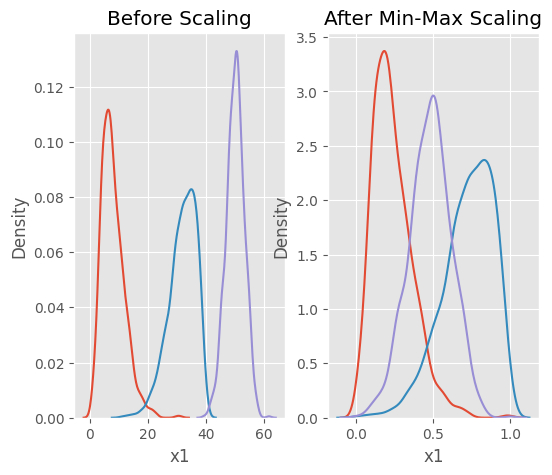

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
plt.show()

In [11]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

In [12]:
np.random.seed(7)


In [16]:
dataset = pd.read_csv('EOD-AAPL_in.csv', usecols=[1,2,3,4])
dataset = dataset.reindex(index = dataset.index[::-1])

In [17]:
obs = np.arange(1, len(dataset) + 1, 1)


In [18]:
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

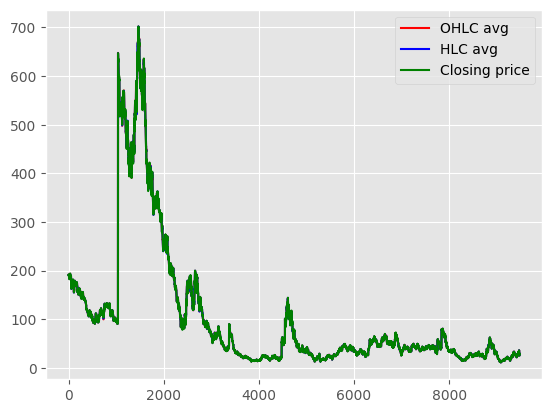

In [19]:
# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

In [20]:
# PREPARATION OF TIME SERIES DATASET
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

In [21]:
# TRAIN-TEST SPLIT
train_OHLC = int(len(OHLC_avg) * 0.75)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

In [22]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
def new_dataset(dataset, step_size):
	data_X, data_Y = [], []
	for i in range(len(dataset)-step_size-1):
		a = dataset[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(dataset[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)
# THIS FUNCTION CAN BE USED TO CREATE A TIME SERIES DATASET FROM ANY 1D ARRAY

In [23]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = new_dataset(train_OHLC, 1)
testX, testY = new_dataset(test_OHLC, 1)

In [24]:
# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

In [25]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [26]:
# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adam') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
7109/7109 - 39s - loss: 0.0018 - 39s/epoch - 5ms/step
Epoch 2/10
7109/7109 - 30s - loss: 1.6796e-04 - 30s/epoch - 4ms/step
Epoch 3/10
7109/7109 - 29s - loss: 1.6488e-04 - 29s/epoch - 4ms/step
Epoch 4/10
7109/7109 - 30s - loss: 1.6120e-04 - 30s/epoch - 4ms/step
Epoch 5/10
7109/7109 - 29s - loss: 1.6311e-04 - 29s/epoch - 4ms/step
Epoch 6/10
7109/7109 - 29s - loss: 1.6470e-04 - 29s/epoch - 4ms/step
Epoch 7/10
7109/7109 - 29s - loss: 1.6514e-04 - 29s/epoch - 4ms/step
Epoch 8/10
7109/7109 - 29s - loss: 1.5911e-04 - 29s/epoch - 4ms/step
Epoch 9/10
7109/7109 - 29s - loss: 1.5724e-04 - 29s/epoch - 4ms/step
Epoch 10/10
7109/7109 - 29s - loss: 1.5652e-04 - 29s/epoch - 4ms/step


In [27]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

75/75 [==============================] - 0s 3ms/step


In [28]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [29]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

Train RMSE: 7.43


In [30]:
# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Test RMSE: 1.71


In [31]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

In [32]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(OHLC_avg)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(OHLC_avg)-1, :] = testPredict

In [33]:
# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)

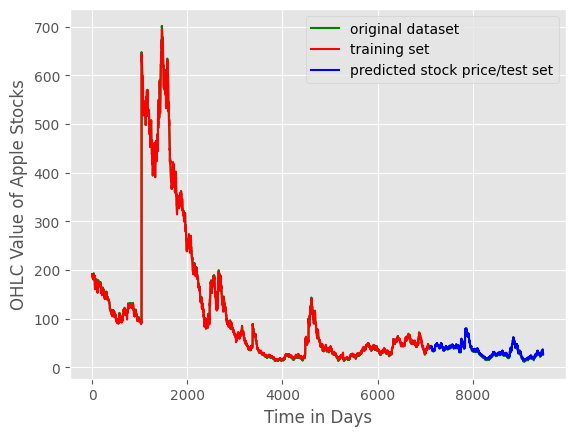

In [34]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Apple Stocks')
plt.show()